# Linear Regression

In this notebook I will work through the Boston data set containing real state data from the Boston area, and train a Linear Regression model to predict the Median value of owner-occupied homes in $1000’s (MEDV). 

## Import Libraries & Load Data

Let's start by importing some of the required libraries and load the data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y_true = data['target']

Let's use lower case in the column names just to make typing easier.

In [4]:
df.columns = [col.lower() for col in df.columns.values]
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

The data set contains 13 predictors. It is very easy to forget the label meaning, let's build a dictionary containing the labels names and the data they represent so it's easier to access when need it.

In [5]:
label_meaning = {'crim': 'CRIM per capita crime rate by town',
                 'zn': 'ZN proportion of residential land zoned for lots over 25,000 sq.ft.',
                 'indus': 'INDUS proportion of non-retail business acres per town',
                 'chas': 'CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
                 'nox': 'NOX nitric oxides concentration (parts per 10 million)',
                 'rm': 'RM average number of rooms per dwelling',
                 'age': 'AGE proportion of owner-occupied units built prior to 1940',
                 'dis': 'DIS weighted distances to five Boston employment centres',
                 'rad': 'RAD index of accessibility to radial highways',
                 'tax': 'TAX full-value property-tax rate per $10,000',
                 'ptratio': 'PTRATIO pupil-teacher ratio by town',
                 'b': 'B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
                 'lstat': 'LSTAT % lower status of the population',
                 'medv': 'MEDV Median value of owner-occupied homes in $1000’s'
                 }

## Check out the Data

Now that we have loaded the data, let's take an overall look at it.

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


We don't have null values but all our variables are floats while for a few ones with it would more appropiate to be integers, let's change their type and then move to the see the statistic summary.

In [8]:
df[['chas','rad']] = df[['chas','rad']].astype('int')

In [9]:
df.describe().iloc[1:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


We have two features (**CRIM** and **ZN**) where the standard deviation is more than double than the mean, another one (**RAD**) where the standard deviation is quite close to the mean. This suggests that the data of this variables is spreaded widely. 

### Correlation

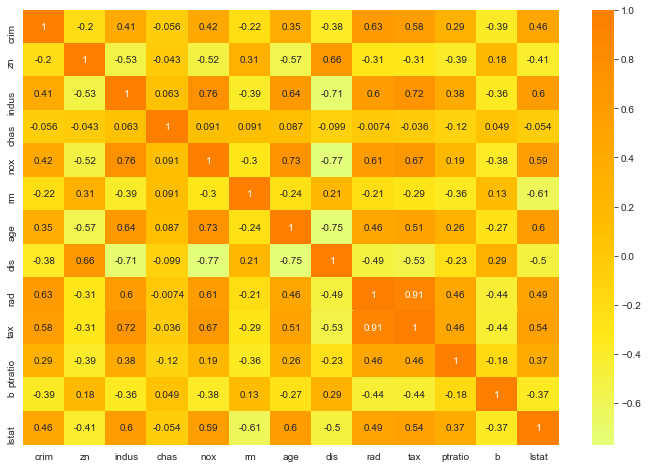

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Wistia');

We can see that the data set is highly correlated. Lets build a data frame with all the variables with a correlation coefficient greater than |.5| to have a better look at the correlated features.

In [11]:
corr_matrix = df.corr()
high_corr = (abs(corr_matrix) >= .5) & (corr_matrix < 1)

pred1 = []
pred2 = []
r = []

# Loop to iterate in the upper diagonal.
k = 0
for m in range(len(high_corr.index)):
    for n in np.arange(k, len(high_corr.columns)):
        if high_corr.iloc[m,n]:
            pred1.append(high_corr.index[m])
            pred2.append(high_corr.columns[n])
            r.append(corr_matrix.iloc[m,n])
    k += 1

In [12]:
# Creating the data frame sorted by the absolute value of the correlation coeffincents.
index = pd.Series(r).transform('abs').sort_values(ascending=False).index
temp = pd.DataFrame({'Predictor 1': pred1, 'Predictor 2': pred2, 'Corr Coefficient': r})
temp = temp.loc[index.values]
corr_features = pd.DataFrame(np.array(temp), columns=temp.columns)
corr_features.head(8)

,Predictor 1,Predictor 2,Corr Coefficient
0,rad,tax,0.910228
1,nox,dis,-0.76923
2,indus,nox,0.763651
3,age,dis,-0.747881
4,nox,age,0.73147
5,indus,tax,0.72076
6,indus,dis,-0.708027
7,nox,tax,0.668023


We have seven predictors with a correlation coefficient greater than 
$|.7|$. Let's explore them:

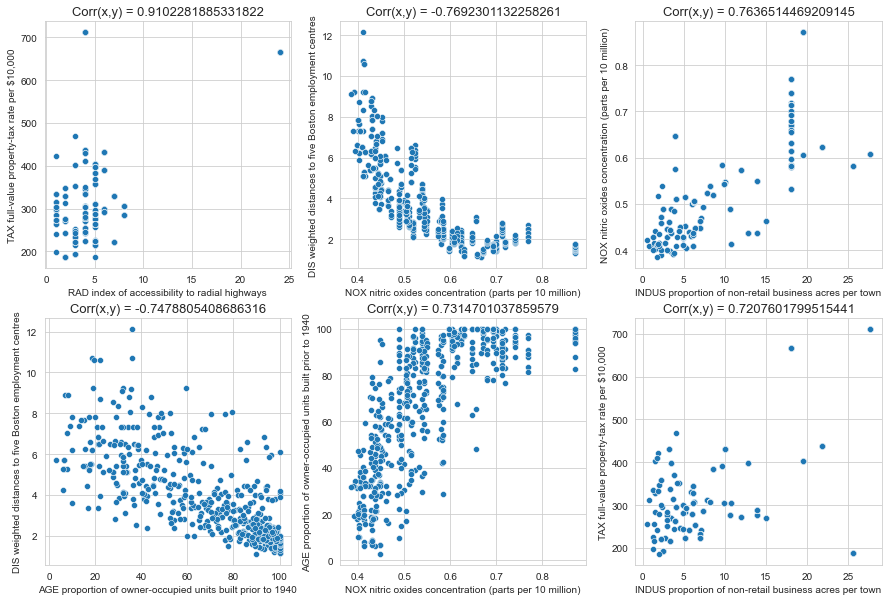

In [13]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

for k in range(6):
    feat1 = corr_features.iloc[k,0]
    feat2 = corr_features.iloc[k,1]
    title = f'Corr(x,y) = {corr_features.iloc[k,2]}'
    
    if k < 3:
        sns.scatterplot(df[feat1], df[feat2], ax=ax[0,k], )
        ax[0,k].set_xlabel(label_meaning[feat1])
        ax[0,k].set_ylabel(label_meaning[feat2])
        ax[0,k].set_title(title, size=13)
    else:
        sns.scatterplot(df[feat1], df[feat2], ax=ax[1,k-3])
        ax[1,k-3].set_xlabel(label_meaning[feat1])
        ax[1,k-3].set_ylabel(label_meaning[feat2])
        ax[1,k-3].set_title(title, size=13)

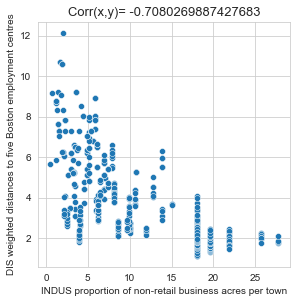

In [14]:
plt.figure(figsize=(4.5,4.5))
sns.scatterplot(df['indus'], df['dis'])
plt.xlabel(label_meaning['indus'])
plt.ylabel(label_meaning['dis'])
plt.title(f'Corr(x,y)= {corr_features.iloc[6,2]}', size=13)
plt.show()

## Data Exploration Analysis

### CHAS

We'll start our categorical variable CHAS 

In [15]:
print(label_meaning['chas'])

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


In [16]:
df.chas.unique()

array([0, 1])

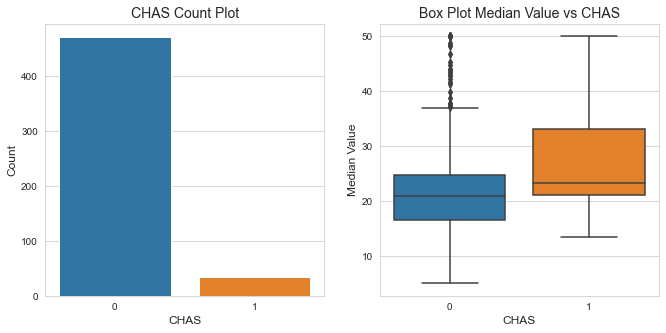

In [17]:
fig, ax = plt.subplots(1,2, figsize=(11,5))

sns.countplot(df.chas, ax=ax[0])
ax[0].set_title('CHAS Count Plot', size=14)
ax[0].set_xlabel('CHAS', size=12)
ax[0].set_ylabel('Count', size=12)
sns.boxplot(df.chas, y_true, ax=ax[1])
ax[1].set_xlabel('CHAS', size=12)
ax[1].set_ylabel('Median Value', size=12)
ax[1].set_title('Box Plot Median Value vs CHAS', size=14);

We can see **CHAS=0** has a higher frequency and a lower median than **CHAS=1**, but there seem to be many outliers in the higher median values. The third quartile of **CHAS=1** looks more spreaded, we should expect higher Median Values when **CHAS=1**. 

### RAD 

Recall that **RAD** has high variance.

In [18]:
print(label_meaning['rad'])

RAD index of accessibility to radial highways


In [19]:
print('Unique values:')
print(np.sort(df['rad'].unique()))
print('\nValue Counts:')
print(df['rad'].value_counts())

Unique values:
[ 1  2  3  4  5  6  7  8 24]

Value Counts:
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64


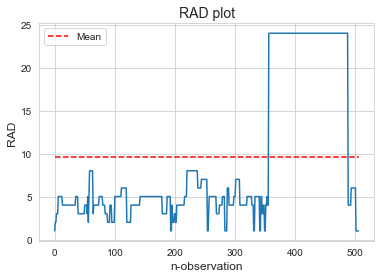

In [20]:
plt.plot(df['rad'])
plt.xlabel('n-observation', size=12)
plt.ylabel('RAD', size=12)
plt.plot( [0,df.shape[0]], [df['rad'].mean(),df['rad'].mean()], ls='--', color='red', label='Mean')
plt.title('RAD plot', size=14)
plt.legend();

We have a high frequency of **RAD=24**, and we can also see a considerable step increment from 8 to 24; perhaps this is causing the mean to be higher go higher with respect to the other **RAD** values.

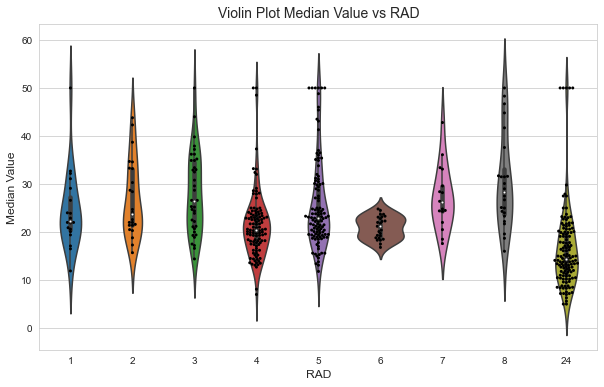

In [21]:
plt.figure(figsize=(10,6))
sns.swarmplot(df.rad, y_true, size=3, color='black')
sns.violinplot(df.rad, y_true)
plt.xlabel('RAD', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Violin Plot Median Value vs RAD', size=14);

In [22]:
print('Correlation(ZN, MEDV): ',df['zn'].corr(pd.Series(y_true)))

Correlation(ZN, MEDV):  0.36044534245054277


We can see that for **ZN=24** we can expect a lower **Median Value** with respect to the other features. Recall that **ZN** is very highly correlated with **TAX**. It's correlation with **Median Values** is very low.

## TAX

In [23]:
label_meaning['tax']

'TAX full-value property-tax rate per $10,000'

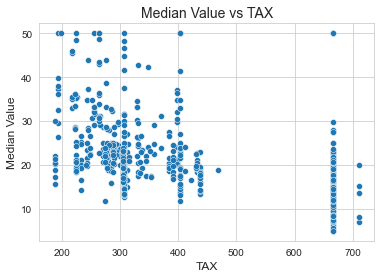

In [24]:
sns.scatterplot(df['tax'], y_true)
plt.xlabel('TAX', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Median Value vs TAX', size=14);

In [25]:
print('Correlation(TAX, MEDV): ',df['tax'].corr(pd.Series(y_true)))

Correlation(TAX, MEDV):  -0.468535933567767


**TAX** is very highly correlated with **RAD** and high correlation with **INDUS**. It has a mild negative correlation with **Median Values**.

## NOX

In [26]:
label_meaning['nox']

'NOX nitric oxides concentration (parts per 10 million)'

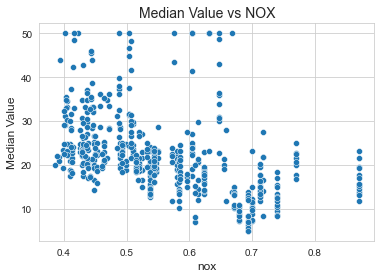

In [27]:
sns.scatterplot(df['nox'], y_true)
plt.xlabel('nox', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Median Value vs NOX', size=14);

In [28]:
print('Correlation (NOX,MEDV): ',df['nox'].corr(pd.Series(y_true)))

Correlation (NOX,MEDV):  -0.42732077237328264


**NOX** is highly correlated with **DIS**, **INDUS** and **AGE**. It has a mild negative correlation with **Median Values**.

## INDUS

In [29]:
label_meaning['indus']

'INDUS proportion of non-retail business acres per town'

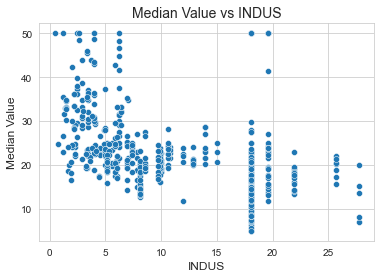

In [30]:
sns.scatterplot(df['indus'], y_true)
plt.xlabel('INDUS', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Median Value vs INDUS', size=14);

In [31]:
print('Correlation (INDUS,MEDV): ',df['indus'].corr(pd.Series(y_true)))

Correlation (INDUS,MEDV):  -0.4837251600283727


**INDUS** is highly correlated with **NOX**, **DIS**, **INDUS** and **AGE**. It has a mild negative correlation with **Median Values**, but the strongest one among our highly correlated features.

## AGE

In [32]:
label_meaning['age']

'AGE proportion of owner-occupied units built prior to 1940'

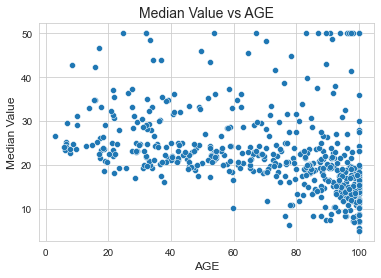

In [33]:
sns.scatterplot(df['age'], y_true)
plt.xlabel('AGE', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Median Value vs AGE', size=14);

In [34]:
print('Correlation AGE & MEDV: ',df['age'].corr(pd.Series(y_true)))

Correlation AGE & MEDV:  -0.3769545650045963


**AGE** is highly correlated with **DIS**. It has a low -0.37 correlation with **Median Values**.

## DIS

In [35]:
label_meaning['dis']

'DIS weighted distances to five Boston employment centres'

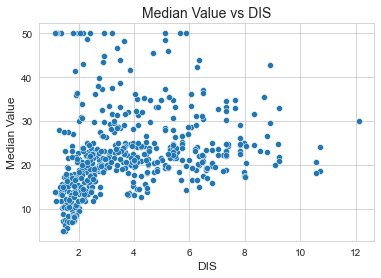

In [36]:
sns.scatterplot(df['dis'], y_true)
plt.xlabel('DIS', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Median Value vs DIS', size=14);

In [37]:
print('Correlation NOX & MEDV: ',df['dis'].corr(pd.Series(y_true)))

Correlation NOX & MEDV:  0.24992873408590388


**DIS** is highly correlated with **AGE**. It has a low correlation with **Median Values**.

### ZN 

Recall that **ZN** has high variance.

In [38]:
label_meaning['zn']

'ZN proportion of residential land zoned for lots over 25,000 sq.ft.'

In [39]:
print('ZN unique values:')
print(np.sort(df['zn'].unique()))
print('ZN number of unique values:')
print(df['zn'].value_counts())

ZN unique values:
[  0.   12.5  17.5  18.   20.   21.   22.   25.   28.   30.   33.   34.
  35.   40.   45.   52.5  55.   60.   70.   75.   80.   82.5  85.   90.
  95.  100. ]
ZN number of unique values:
0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64


In [40]:
df.shape[1]

13

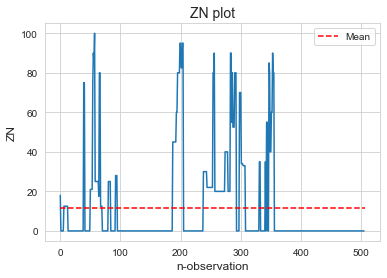

In [41]:
plt.plot(df['zn'], )
plt.xlabel('n-observation', size=12)
plt.ylabel('ZN', size=12)
plt.plot( [0,df.shape[0]], [df['zn'].mean(),df['zn'].mean()], ls='--', color='red', label='Mean')
plt.legend()
plt.title('ZN plot', size=14);         

We have a very high frequency of **ZN=0** , this could be the reason why the mean is considerably lower with the respect to the highest **ZN** values.

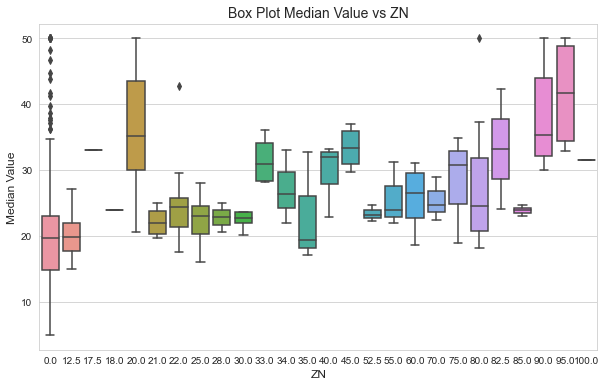

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(df.zn, y_true)
plt.xlabel('ZN', size=12)
plt.ylabel('Median Value', size=12)
plt.title('Box Plot Median Value vs ZN', size=14);

In [43]:
print('Correlation (ZN,MEDV): ',df['zn'].corr(pd.Series(y_true)))

Correlation (ZN,MEDV):  0.36044534245054277


**ZN** has a low correlation of 0.36 with **Median Values**. It doesn't seems that there is a pattern that should expect from **Median Values**.

## CRIM

Recall that **CRIM** has high variance.

In [44]:
label_meaning['crim']

'CRIM per capita crime rate by town'

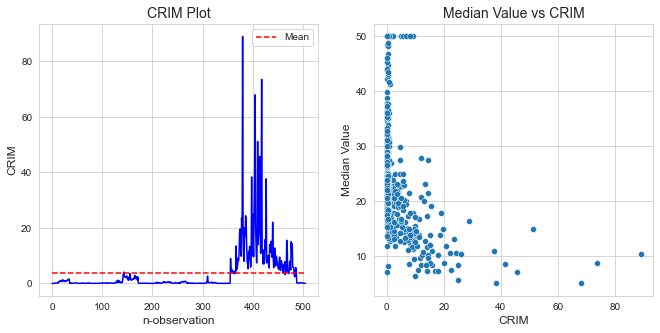

In [45]:
fig, ax = plt.subplots(1,2, figsize=(11,5))

ax[0].plot(df['crim'], color='blue')
ax[0].set_title('CRIM Plot', size=14)
ax[0].set_xlabel('n-observation', size=12)
ax[0].set_ylabel('CRIM', size=12)
ax[0].plot( [0,df.shape[0]], [df['crim'].mean(),df['crim'].mean()], ls='--', color='red', label='Mean')
ax[0].legend()
sns.scatterplot(df['crim'], y_true, ax=ax[1])
ax[1].set_xlabel('CRIM', size=12)
ax[1].set_ylabel('Median Value', size=12)
ax[1].set_title('Median Value vs CRIM', size=14);

In [46]:
print('CRIM min value: ', df.crim.min())
print('Correlation (CRIM,MEDV): ',df['crim'].corr(pd.Series(y_true)))

CRIM min value:  0.00632
Correlation (CRIM,MEDV):  -0.3883046085868113


Again we have a huge concentration of low (almost zero) values which could be lowering the mean. **CRIM** has a low -.039 correlation with **Median Value**. 

## LSTAT, RM, B, PTRATIO

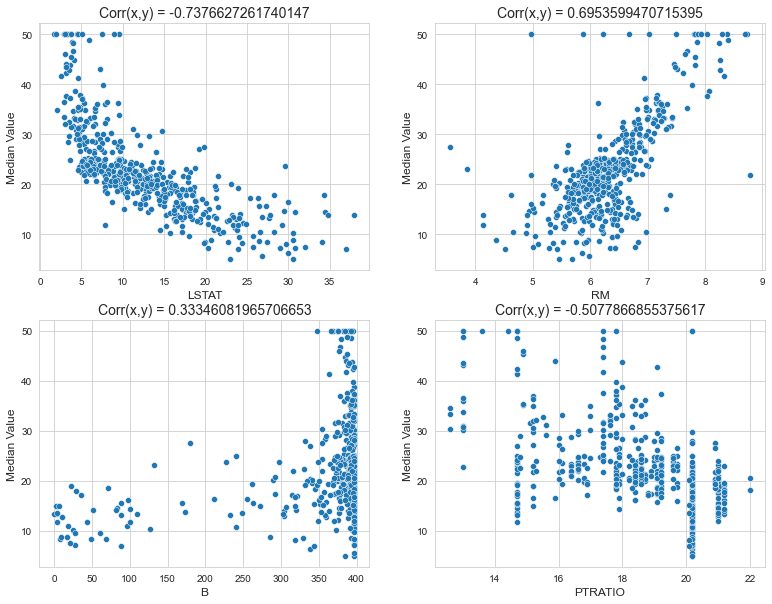

In [47]:
temp = df[['lstat','rm','b','ptratio']]

fig, ax = plt.subplots(2,2, figsize=(13,10))
col = 0
for m in range(2):
    for n in range(2):
        title = f'Corr(x,y) = {temp[temp.columns.values[col]].corr(pd.Series(y_true))}'
        sns.scatterplot(temp.iloc[:,col], y_true, ax=ax[m,n] )
        ax[m,n].set_xlabel(temp.columns.values[col].upper(), size=12)
        ax[m,n].set_ylabel('Median Value', size=12)
        ax[m,n].set_title(title, size=14)
        col += 1

**LSTAT** and **RM** a correlation of -0.74 and 0.7 respectively with **Median Value**, the highest from all our features. **PTRATIO** has a mild correlation of -0.51 and **B** a low 0.33 with **Median Value**   

Let's take look at the distribution plot of our endogenous variable.

Jarque-Bera Results:
JB Statistic:  148.41187223926872 
JB p_value:  5.926133336605353e-33 
Skewness:  1.104810822864635 
Kurtosis:  4.468628772274746


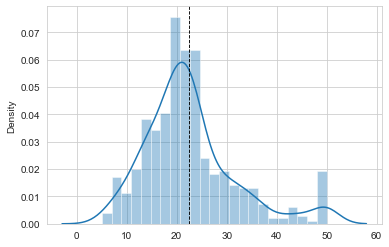

In [48]:
from statsmodels.stats.stattools import jarque_bera
stat, jb_pval, skew, kurt = jarque_bera(y_true)
print('Jarque-Bera Results:')
print('JB Statistic: ', stat,
      '\nJB p_value: ', jb_pval,
      '\nSkewness: ', skew,
      '\nKurtosis: ', kurt)

sns.distplot(y_true)
plt.axvline(y_true.mean(), ls='--', lw=.9, color='black');

From our Jarque-Bera test for normally distribution we see a **p-value < 0.05**, which means that we're rejecting our null hypothesis that our data has a normal distribution.

Let's apply a **Box-Cox** transformation and see our results:

Jarque-Bera Results:

JB p_value:  0.05762743520453437 
Skewness:  0.01583478691187103 
Kurtosis:  3.5193352664240196


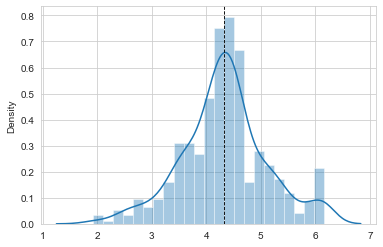

In [49]:
from scipy.stats import boxcox
y = boxcox(y_true)

_, jb_pval, skew, kurt = jarque_bera(y[0])
print('Jarque-Bera Results:')
print('\nJB p_value: ', jb_pval,
      '\nSkewness: ', skew,
      '\nKurtosis: ', kurt)

sns.distplot(y[0])
plt.axvline(y[0].mean(), ls='--', lw=.9, color='black');

Now we got a **p-value = 0.576 > 0.05**, so we're barely failing to reject the null hypothesis that our data is normally distributed. Our plot looks more centered as well; however, it seems that we have heavy outliers on our 4th quartile. 

We'll use our transformed response to fit our model.

In [50]:
y_true = y[0]

## Linnear Regression

We noticed that we had highly correlated pairs of features so we're likely to have multicollinearity problems. Before we start let's get the variance inflation factors from our data.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

v = [variance_inflation_factor(df[list(df.columns.values)].values,i) for i in range(13)]
vif = pd.DataFrame(v, columns=['VIF'], index = df.columns.values)
vif.sort_values('VIF')

,VIF
chas,1.152952
crim,2.100373
zn,2.844013
lstat,11.102025
indus,14.485758
dis,14.699652
rad,15.167725
b,20.104943
age,21.386850
tax,61.227274


As we expected we have huge autocorrelation problems. We'll consider our VIF results plus our observations during our EDA to select features for our model.

### Train & Test Sample

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=.3, random_state=279)

### Fitting  Linear Regresion 

In [53]:
import statsmodels.api as sm
sm_train = sm.add_constant(X_train)
slm= sm.OLS(np.log(y_train), sm_train[['const','zn','crim','chas','lstat','dis','rm']]).fit()
features_selected = ['zn','crim','chas','lstat','dis','rm']
print(slm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.37e-97
Time:                        12:08:48   Log-Likelihood:                 313.84
No. Observations:                 354   AIC:                            -613.7
Df Residuals:                     347   BIC:                            -586.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4897      0.078     19.003      0.0

We ended up with a model containing 6 features: **ZN, CRIM , CHAS, LSTAT, DIS, NOX, RM**.

A few notes from the proccess:
* Improving Adj. R-squared while mantaining a low conditional number was our priority in this approach.
* Features with the lowest VIF were mostly selected. While **RM** has a high VIF, it is highly correlated with **Median Value** so it improved our model. Adding **NOX** would've improved a little bit both R-squared and Adj. R-squared; however, it would have incresed both the condition number and kurtosis, so it was left out but we'll keep it in mind.

Now let's do Forward Stepwise Selection to see what we get. Our selection criteria for adding variables will be reducing **RSS**.

## Forward Stepwise Selection

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools

p = len(df.columns)
n = len(y_test)
remaining_features = list(df.columns.values) 
selected_features = []
RSS_list = []
R2_list = []
R2adj_list = []
features_list = dict()

for i in range(1,p+1):
    best_RSS = np.inf

    for comb in itertools.combinations(remaining_features, 1):
        cols = selected_features+list(comb)
        lm_temp = LinearRegression()
        lm_temp = lm_temp.fit(X_train[cols], y_train)
        y_pred = lm_temp.predict(X_test[cols])
        RSS = mean_squared_error(y_test, y_pred) * n
        
        if RSS < best_RSS:
    
                best_RSS = RSS
                r2 = lm_temp.score(X_test[cols], y_test)
                r2_adj = 1 - (1-r2) * (n-1)/(n-i-1)
                best_feature = comb[0]       
        
    remaining_features.remove(best_feature)
    selected_features.append(best_feature)
    
    RSS_list.append(best_RSS)
    R2_list.append(r2)
    R2adj_list.append(r2_adj)
    features_list[i] = selected_features.copy()

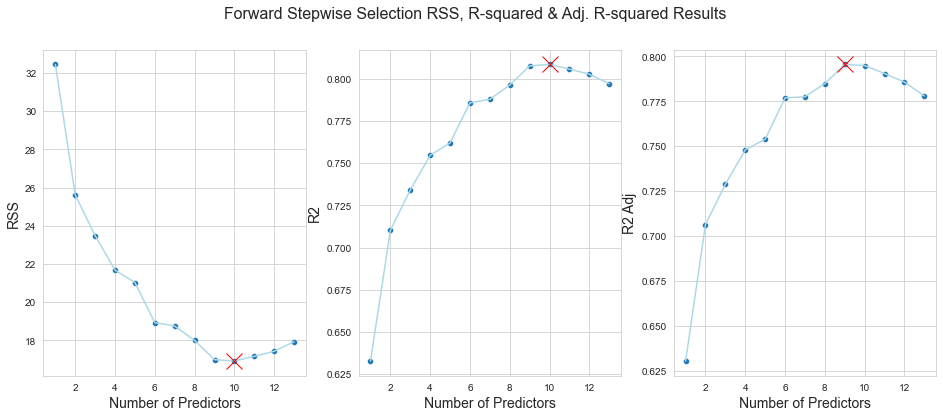

In [55]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

seq = np.arange(1,13+1)
y_axis = ['RSS', 'R2', 'R2 Adj']
var = [RSS_list, R2_list, R2adj_list]

for i in range(3):
    sns.scatterplot(seq, var[i], ax=ax[i])
    ax[i].plot(seq,var[i], color='lightblue')
    ax[i].set_xlabel('Number of Predictors', size=14)
    ax[i].set_ylabel(y_axis[i], size=14)
    
    if y_axis[i] == 'RSS':
        ax[i].plot(var[i].index(min(var[i]))+1, min(var[i]), marker='x', color='red', markersize=16)
    else:
        ax[i].plot(var[i].index(max(var[i]))+1, max(var[i]), marker='x', color='red', markersize=16)
    
fig.suptitle('Forward Stepwise Selection RSS, R-squared & Adj. R-squared Results', fontsize = 16)
plt.show()

The model with 9 features had the best performance. Let's train the model and see the results. 

In [56]:
lm_fwd = LinearRegression()
lm_fwd.fit(X_train[features_list[9]], y_train)
y_pred_fwd = lm_fwd.predict(X_test[features_list[9]])
resid_fwd = y_test-y_pred_fwd
RSS_fwd = mean_squared_error(y_test, y_pred_fwd) * len(y_test)
R2_fwd = lm_fwd.score(X_test[features_list[9]], y_test)
adjR2_fwd = max(R2adj_list)

print('Results:')
print('\nForward Selection features:')
print(features_list[9])
print('\nForward Selection RSS: ', RSS_fwd)
print('Forward Selection R-squared: ', R2_fwd)
print('Forward Selection Adj. R-squared: ', adjR2_fwd)

Results:

Forward Selection features:
['lstat', 'rm', 'b', 'ptratio', 'dis', 'nox', 'crim', 'rad', 'tax']

Forward Selection RSS:  16.991530437058703
Forward Selection R-squared:  0.8076892653782649
Forward Selection Adj. R-squared:  0.7955005568459014


## OLS Assumptions

Now let's fit our first model, which we'll call **Selection**.

In [57]:
p = len(features_selected)

lm = LinearRegression()
lm.fit(X_train[features_selected], y_train)
y_pred = lm.predict(X_test[features_selected])
resid = y_test-y_pred
RSS = mean_squared_error(y_test, y_pred) * len(y_test)
R2 = lm.score(X_test[features_selected], y_test)
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

print('Results:')
print('\nForward Selection features:')
print(features_selected)
print('\nSelection RSS: ', RSS)
print('Selection R-squared: ', R2)
print('Selection Adj. R-squared: ', adjR2)

Results:

Forward Selection features:
['zn', 'crim', 'chas', 'lstat', 'dis', 'rm']

Selection RSS:  23.137100485545723
Selection R-squared:  0.7381334890418247
Selection Adj. R-squared:  0.7272976334159692


Our Stepwise Forward Selection model has lower RSS. Let's see its summary table:

In [58]:
print(sm.OLS(y_train, sm_train[features_list[9]]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              3251.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                        0.00
Time:                        12:08:49   Log-Likelihood:                         -235.54
No. Observations:                 354   AIC:                                      489.1
Df Residuals:                     345   BIC:                                      523.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This model has a very high **R-squared: 0.988**. We can see that in included some feautures with a **p-value > 0.05**, and it also rejected the JB null hypothesis that the residuals are normally distributed. We also have a warning for a high condition number.

Let's continue to check some of our OLS assumptions on both models and compare them:

### Linearity

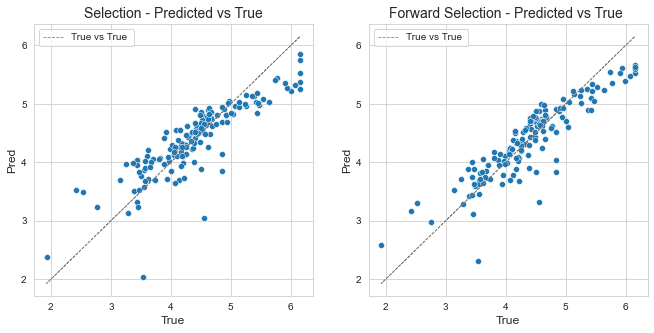

In [59]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
pred = y_pred, y_pred_fwd
title = 'Selection - Predicted vs True', 'Forward Selection - Predicted vs True '

for i in range(2):
    sns.scatterplot(y_test, pred[i], ax=ax[i])
    ax[i].plot(y_test, y_test, ls='--', color='gray', lw=.8, label='True vs True ')
    ax[i].set_xlabel('True', size=12)
    ax[i].set_ylabel('Pred', size=12)
    ax[i].set_title(title[i], size=14)
    ax[i].legend()

Both models seem follow a linear trend until the top end. Our **Forward Selection** model seems a little more stable compared to our **Selection** model, which also looks a little more spreaded at the bottom end.

Let's also check a Predicted vs Fitted plot, which also will help us to check Heterokadisticity.

### Homoscedasticity

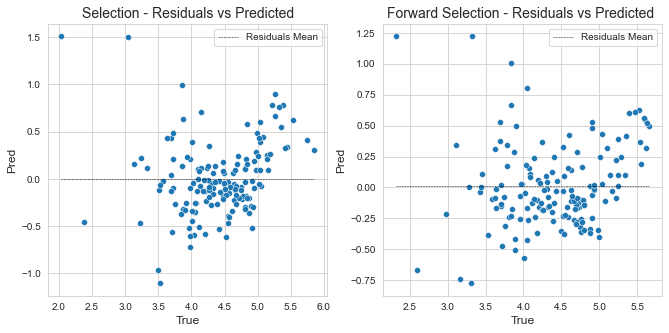

In [60]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
residuals = resid, resid_fwd
pred = y_pred, y_pred_fwd
title = 'Selection - Residuals vs Predicted', 'Forward Selection - Residuals vs Predicted '

for i in range(2):
    res = residuals[i].mean()
    sns.scatterplot(pred[i], residuals[i], ax=ax[i])
    ax[i].plot([pred[i].min(),pred[i].max()], [res, res], ls='--', color='black', lw=.5, label='Residuals Mean')
    ax[i].set_xlabel('True', size=12)
    ax[i].set_ylabel('Pred', size=12)
    ax[i].set_title(title[i], size=14)
    ax[i].legend()

From the plot we can see that there data points are rather uniquely dispersed, failing the homoscedasticity assumption.

### Normal Residuals

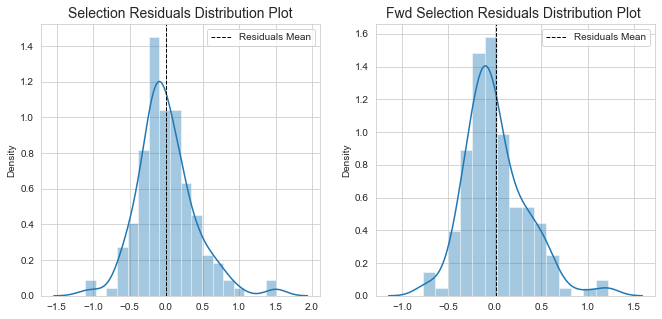

In [61]:
fig, ax = plt.subplots(1,2, figsize=(11,5))
residuals = resid, resid_fwd
pred = y_pred, y_pred_fwd
title = 'Selection Residuals Distribution Plot', 'Fwd Selection Residuals Distribution Plot '

for i in range(2):
    res = residuals[i].mean()
    sns.distplot(residuals[i], ax=ax[i])
    ax[i].axvline(res, ls='--', color='black', lw=1, label='Residuals Mean')
    ax[i].set_title(title[i], size=14) 
    ax[i].legend()

Both of our plots have a positive skewness, so our residuals are not noramlly distributed. Let's run a Jarque-Bera test to have more information. 

In [62]:
stat, jb_pval, skew, kurt = jarque_bera(resid)
stat_fwd, jb_pval_fwd, skew_fwd, kurt_fwd = jarque_bera(resid_fwd)
print('Results:')
print('\nSelection JB statistic: ', stat,
      '\nForward Selection JB statistic: ', stat_fwd,
      '\n\nSelection JB p_value: ', jb_pval,
      '\nForward Selection JB p_value: ', jb_pval_fwd,
      '\n\nSelection Skewness: ', skew,
      '\nForward Selection Skewness: ', skew_fwd,
      '\n\nSelection Kurtosis: ', kurt,
      '\nForward Selection Kurtosis: ', kurt_fwd)

Results:

Selection JB statistic:  47.02061474027982 
Forward Selection JB statistic:  34.52900243478829 

Selection JB p_value:  6.160319559823399e-11 
Forward Selection JB p_value:  3.1777694712956244e-08 

Selection Skewness:  0.7949754892221603 
Forward Selection Skewness:  0.8716129697366682 

Selection Kurtosis:  5.212772802778099 
Forward Selection Kurtosis:  4.553419156830703


Our **p-value < .05** confirms that our residuals are not normally distributed. Comparing our models, our test statistic from our **Forward Selection** model is smaller. This indicates that, while still far away from being normally distributed (we have a very tiny p-value), it's closer compared to our **Selection Model**. On the same regard, the kurtosis is closer to 3, which is the the value expected for a normally distributed data. 

### No Perfect Collinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v = [variance_inflation_factor(X_test[features_selected].values,i) for i in range(6)]
vif = pd.DataFrame(v, columns=['VIF Selction'], index = features_selected)
v2 = [variance_inflation_factor(X_test[features_list[9]].values,i) for i in range(9)]
vif_fwd = pd.DataFrame(v2, columns=['VIF Fwd Selection'], index = features_list[9])

print('Results:\n',vif)
print('\n', vif_fwd)

Results:
        VIF Selction
zn         2.690080
crim       2.091624
chas       1.103546
lstat      5.478021
dis        9.868588
rm        10.263630

          VIF Fwd Selection
lstat            11.238677
rm               58.400435
b                22.453164
ptratio          82.468799
dis               8.033968
nox              54.372591
crim              3.327744
rad              14.475876
tax              45.889830


While collinearity is still present, we have less issues in our **Selection Model** with only 3 features above 5. The other 3 reduced their respective VIF compared to our previous test.

### No Serial Correlation of Error Terms

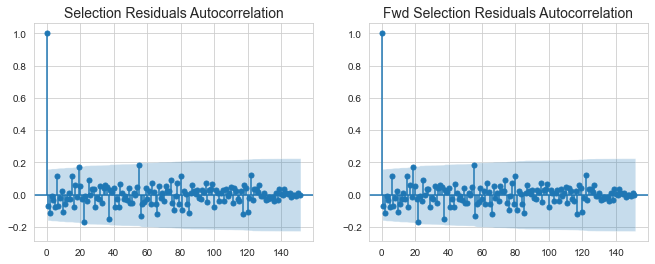

In [64]:
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(1,2, figsize=(11,4))
residuals = resid, resid_fwd
title = 'Selection Residuals Autocorrelation', 'Fwd Selection Residuals Autocorrelation'

for i in range(2):
    sgt.plot_acf(resid, lags=len(y_test)-1, ax=ax[i])
    ax[i].set_title(title[i], size=14) 
plt.show()

All the residuals points are under the blue shadow - which represent the 95% confidence interval, therefore there's enough evidence to say that correlation is not present in our error terms. 

## Conclusions

* We failed to meet almost all our OLS assumptions - only one was met, therefore our model's coefficients don't give us the best linear ubiased estimate.
* The **Selection** model was built with the goal of dealing with collinearity among our features. We were able to reduce the VIF values at the cost of a lower R-square; however, it was slightly outperformed by our **Forward Selection** model which had major collinearity issues, but had a higher R-squared. 

## Comments

Encountering major collinearity issues at the beginning of my analysis led me to the path presented in this notebook. I wasn't able to fix collinearity and the assumptions were not met, so future work needs to be done. Some ideas I have are checking for outliers and high leverage points, and trying some transformations as well.

Thanks for reading this notebook.